### Regression exercise (강재영)

### 서울시 따릉이 자전거 이용 예측 AI모델
### https://dacon.io/competitions/open/235576/data 데이터 사용

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

In [22]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('./bike_train.csv')
print(bike_df.shape)
bike_df['hour_bef_temperature'] = bike_df['hour_bef_temperature'].fillna(value = bike_df['hour_bef_temperature'].mean())
bike_df['hour_bef_precipitation'] = bike_df['hour_bef_precipitation'].fillna(value = bike_df['hour_bef_precipitation'].mean())
bike_df['hour_bef_windspeed'] = bike_df['hour_bef_windspeed'].fillna(value = bike_df['hour_bef_windspeed'].mean())
bike_df['hour_bef_humidity'] = bike_df['hour_bef_humidity'].fillna(value = bike_df['hour_bef_humidity'].mean())
bike_df['hour_bef_visibility'] = bike_df['hour_bef_visibility'].fillna(value = bike_df['hour_bef_visibility'].mean())
bike_df['hour_bef_ozone'] = bike_df['hour_bef_ozone'].fillna(value = bike_df['hour_bef_ozone'].mean())
bike_df['hour_bef_pm10'] = bike_df['hour_bef_pm10'].fillna(value = bike_df['hour_bef_pm10'].mean())
bike_df['hour_bef_pm2.5'] = bike_df['hour_bef_pm2.5'].fillna(value = bike_df['hour_bef_pm2.5'].mean())

bike_df.isna().sum()

(1459, 11)


id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [23]:
bike_df.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [24]:
bike_df.info()
bike_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()을 이용해 RMSLE 계산
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

#사이킷런의 mean_square_error()을 이용해 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

#MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y, pred)
    #MAE는 sklearn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

#Train set/Test set 나누기 test
#test size: 30%
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE: 0.742, RMSE: 50.505, MAE: 37.946


In [27]:
#선형회귀 모델 가정 확인
#beta0가 구성될 수 있도록 1로 구성된 벡터를 추가하는 과정
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

C:\Users\tom11\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


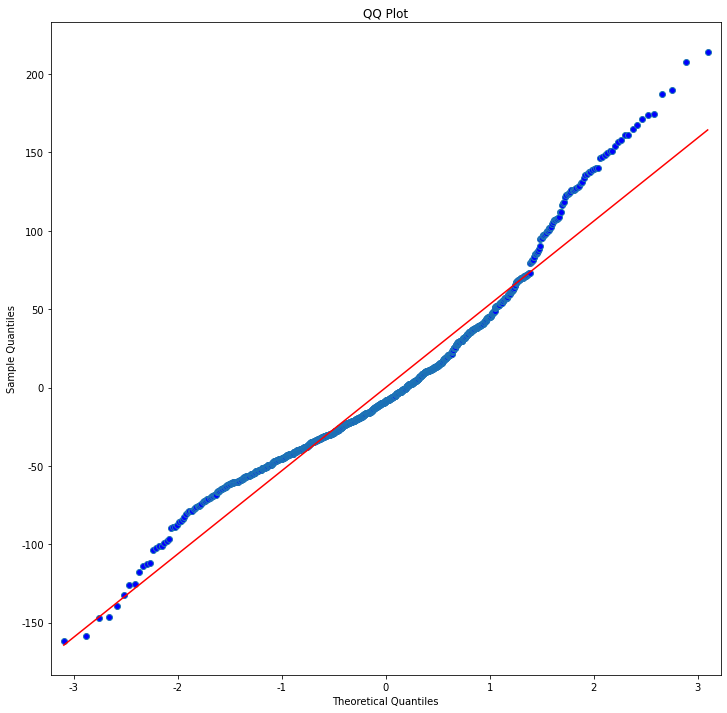

In [28]:
#확률오차의 정규성 확인
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False #음수 폰트 깨짐 방지
fig,ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color = '#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

C:\Users\tom11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fittered values'), Text(0, 0.5, 'Residuals')]

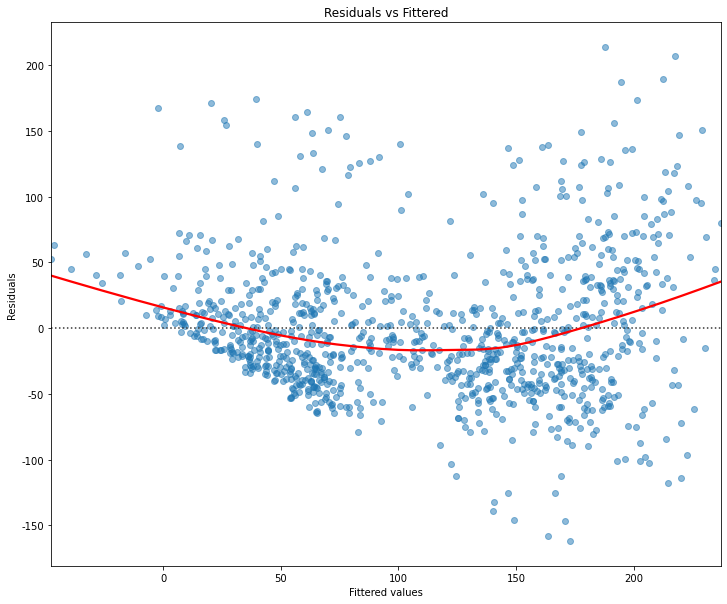

In [29]:
#확률오차의 등분산성 확인
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1,1)
fig.set_figheight(10)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha':0.5},
             line_kws={'color':'red'}, ax=ax)

ax.title.set_text('Residuals vs Fittered')
ax.set(xlabel='Fittered values', ylabel='Residuals')

In [30]:
def get_top_error_data(y_test, pred, n_tops = 5):
    #DataFrame의 칼럼으로 실제 대여 횟수 (count)와 예측값을 서로 비교할 수 있도록 생성.
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
#예측값과 실제 값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops=5)

     real_count  predicted_count   diff
63        431.0            244.0  187.0
18        398.0            216.0  182.0
305       339.0            162.0  177.0
410       337.0            170.0  167.0
31        194.0             27.0  167.0


<AxesSubplot:>

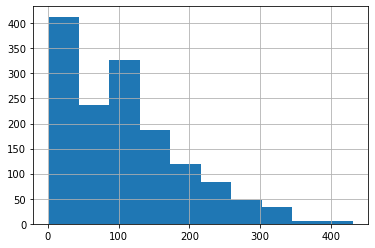

In [31]:
y_target.hist()

#### count 칼럼 값이 정규 분포 값이 아닌 0~100 사이에 왜곡되어 있기 때문에 로그를 적용하여 변환

<AxesSubplot:>

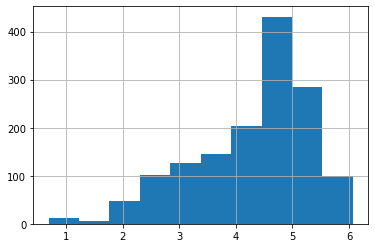

In [32]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [33]:
#타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

#로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

#테스트 데이터 세트의 Target 값은 로그 변환되었으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

#예측값 또한 로그 변환된 타깃 기반으로 학습되어 예측되었으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 0.633, RMSE: 50.272, MAE: 34.940


#### RMSLE, RMSE, MAE 값이 모두 줄어들었음

<AxesSubplot:>

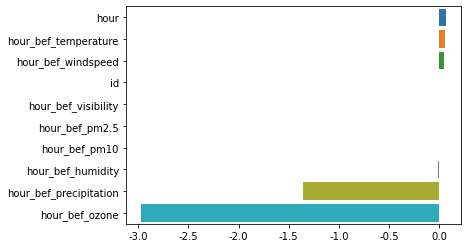

In [34]:
#각 피처의 회귀 계수 값 시각화
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [35]:
#여러 피처를 One-Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
                                                     'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
                                                     'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'])

In [36]:
#One-Hot Encoding이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                   test_size=0.3, random_state=0)

#모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
#end of function get_model_predict

#모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)
elasticnet_reg = ElasticNet(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg, elasticnet_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 1.439, RMSE: 550.880, MAE: 206.308
### Ridge ###
RMSLE: 0.542, RMSE: 53.940, MAE: 35.996
### Lasso ###
RMSLE: 0.540, RMSE: 55.472, MAE: 36.465
### ElasticNet ###
RMSLE: 0.533, RMSE: 53.649, MAE: 35.439


In [37]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:
        #분할하지 않고 전체 데이터로 cross_val_score() 수행. 모델별 CV RMSE 값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                            scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))
    
models = [lr_reg, ridge_reg, lasso_reg, elasticnet_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [51.595 60.752 50.112 54.047 46.451]
LinearRegression CV 평균 RMSE 값: 52.591

Ridge CV RMSE 값 리스트: [51.582 60.89  50.631 54.092 47.006]
Ridge CV 평균 RMSE 값: 52.84

Lasso CV RMSE 값 리스트: [51.579 60.724 50.162 54.008 46.537]
Lasso CV 평균 RMSE 값: 52.602

ElasticNet CV RMSE 값 리스트: [51.614 60.831 50.583 54.03  47.005]
ElasticNet CV 평균 RMSE 값: 52.812


In [38]:
#릿지 모델과 라쏘, 엘라스틱넷 모델의 최적화 alpha 값을 추출
from sklearn.model_selection import GridSearchCV

def print_best_params(models, params):
    grid_model = GridSearchCV(model, param_grid=params,
                             scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                             np.round(rmse, 4), grid_model.best_params_))

ridge_params = { 'alpha': [0.1, 1, 5, 10, 15, 20, 50, 100] }
lasso_params = { 'alpha': [0.05, 0.1, 0.5, 1, 5, 10] }
elasticnet_params = { 'alpha': [0.05, 0.1, 0.5, 1, 5, 10] }
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)
print_best_params(elasticnet_reg, elasticnet_params)

ElasticNet 5 CV 시 최적 평균 RMSE 값:53.3411, 최적 alpha:{'alpha': 0.1}
ElasticNet 5 CV 시 최적 평균 RMSE 값:53.1888, 최적 alpha:{'alpha': 0.05}
ElasticNet 5 CV 시 최적 평균 RMSE 값:53.1888, 최적 alpha:{'alpha': 0.05}


In [39]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#랜덤 포레스트, GBM, XGBoost, LightGBM model별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    #XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values,
                     y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.545, RMSE: 50.061, MAE: 33.305
### GradientBoostingRegressor ###
RMSLE: 0.514, RMSE: 47.790, MAE: 31.714
### XGBRegressor ###
RMSLE: 0.529, RMSE: 50.198, MAE: 31.750
### LGBMRegressor ###
RMSLE: 0.562, RMSE: 56.208, MAE: 38.080
